# Google Analytics(GA4) 사용자 행동 로그(Event Log) 분석

## 1. 사용자 행동 흐름(UX) 분석
- **event_name**: 이벤트 유형(예: *screen_view, scroll, click* 등)을 나타냅니다.  
  - 어떤 기능(화면 보기, 스크롤, 클릭 등)이 많이 사용되는지를 파악해 UX 개선이나 기능별 중요도 설정 등에 활용할 수 있습니다.
- **event_params**: 이벤트에 대한 세부 파라미터(*scroll_depth, button_name* 등)가 포함되어 있을 수 있습니다.  
  - 이벤트별 구체적인 맥락(예: 몇 %까지 스크롤했는지, 어떤 버튼이 클릭되었는지 등)을 확인해 고객 여정(Customer Journey)을 세부적으로 분석할 수 있습니다.

이를 통해 **사용자가 앱(또는 웹사이트) 내에서 어떤 경로를 거쳐 어떤 행동을 수행하는지** 파악할 수 있으며, **핵심 이탈 지점**을 찾거나 **사용성 개선 포인트**를 도출하는 데 도움이 됩니다.

---

## 2. 마케팅 채널 및 트래픽 소스 분석
- **collected_traffic_source**, **session_traffic_source_last_click**, **publisher**: 사용자가 어떤 채널(검색, SNS, 광고, 이메일 등)을 통해 유입되었는지를 보여주는 정보로 보입니다.  
  - 각각의 채널(또는 캠페인, 매체)에서 유입된 사용자가 실제로 앱/웹에서 얼마나 활동하는지, 전환(구매, 회원가입 등)을 얼마나 일으키는지를 판단하는 데 활용됩니다.
  - 마케팅 비용 대비 성과(ROAS, CPA 등)를 평가하거나 예산을 효율적으로 배분하는 데에 필수적인 지표입니다.

---

## 3. 사용자 식별 및 속성 파악
- **user_id** / **user_pseudo_id**:  
  - *user_id*는 로그인 등으로 식별된 사용자의 ID를 의미할 수 있고,  
  - *user_pseudo_id*는 로그인하지 않은 사용자(또는 디바이스)에 대한 익명 ID를 의미합니다.
- **user_properties**: 각 사용자에게 귀속된 속성(예: 회원 레벨, OS 버전, 가입일, 성별, 관심 카테고리 등)이 들어 있을 수 있습니다.
- **user_first_touch_timestamp**: 사용자가 처음 앱/웹을 접속한 시점으로, 가입 후 얼마나 시간이 지났는지, 신규 vs. 기존 사용자인지 등을 구분할 수 있습니다.
- **is_active_user**: 해당 사용자가 활성 사용자(최근 접속 등)인지 여부를 나타냅니다.  
  - 이를 통해 **사용자 세분화(Segmentation)**, **리텐션(Retention) 분석**, **이탈률** 등을 계산할 수 있습니다.

이러한 정보들은 “**어떤 사용자들이 자주 활동하는가?**” “**어떤 특성을 가진 사용자들이 높은 전환율을 보이는가?**” 등의 질문에 답할 수 있게 해 줍니다.

---

## 4. 시간 및 세션 분석
- **event_date**, **event_timestamp**: 이벤트 발생 날짜 및 구체적 시간(마이크로초 단위) 정보를 나타냅니다.  
  - 시간대별 트래픽 변화를 분석하거나, 특정 캠페인 진행 기간 동안의 효과 측정을 할 수 있습니다.
- **event_previous_timestamp**: 바로 이전 이벤트가 발생한 시점과의 차이를 통해 세션 길이나 사용자 행동 간격 등을 추정할 수 있습니다.
- **batch_event_index**: 같은 세션(또는 배치) 내 이벤트 순서를 나타낼 수 있습니다.  
  - 사용자 한 세션 내에서 어떤 이벤트 시퀀스로 행동이 일어났는지, 전환 경로에 이탈 지점이 어딘지 등의 파악에 유용합니다.

---

## 5. 매출/이커머스 분석
- **event_value_in_usd**: 이벤트가 발생했을 때의 매출(혹은 가치)이 달러 단위로 집계되는 컬럼으로 보이지만, 현재는 결측치(0 non-null) 상태입니다.  
  - 실제 구매 이벤트(purchase, ecommerce_purchase) 등에 대하여 매출액을 기록할 수 있으며, 이를 통해 **ARPU(사용자당 평균 매출)**, **ROAS(광고 대비 매출)** 등의 지표를 계산할 수 있습니다.
- **ecommerce**, **items**: 전자상거래 상세 정보(상품 ID, 카테고리, 가격, 수량 등)를 담을 수 있는 JSON 형태 컬럼입니다.  
  - 구매(결제) 또는 장바구니 담기 등의 이벤트가 제대로 기록되었다면, **품목별 매출 분석**, **장바구니 이탈분석**, **구매 퍼널 분석** 등이 가능해집니다.

현재 데이터 예시에서는 대부분 비어 있으므로, **전자상거래 기능을 사용하지 않거나 아직 설정이 안 된 상태**로 추정됩니다. 추후 GA4 이커머스 설정을 통해 구매 이벤트가 기록된다면 매출 분석이 가능해집니다.

---

## 6. 디바이스 및 지역(Geo) 분석
- **device**, **geo**, **app_info**, **platform**:  
  - 사용자가 어떤 기기를 사용하며(스마트폰 OS, 브라우저 등), 어느 지역에서(geo) 접속했는지, 앱 버전(app_info) 등이 담겨 있을 수 있습니다.
  - 이를 통해 **디바이스별 이탈률**, **버전별 에러 발생률**, **지역별 매출/전환율** 등을 모니터링하여, 향후 디바이스 호환성 개선이나 특정 지역을 타겟팅한 마케팅 전략에 활용할 수 있습니다.

---

## 7. 전반적인 비즈니스 활용 시사점
1. **사용자 참여도(Engagement) 파악**  
   - *screen_view*, *scroll* 등의 이벤트 빈도, 스크롤 깊이, 체류 시간 등을 통해 **콘텐츠 소비 행태**와 **주요 이탈 지점**을 식별할 수 있습니다.  
   - 이를 토대로 사이트/앱 UI·UX 개선을 추진하거나, 콘텐츠 전략을 재정비할 수 있습니다.

2. **마케팅 채널 성과 측정**  
   - *collected_traffic_source* 및 *session_traffic_source_last_click* 같은 컬럼을 활용해 **채널별 유입량**, **전환율**, **재방문율** 등을 구분해서 분석할 수 있습니다.  
   - 어떤 채널에서 온 사용자가 가장 오래 머무르고, 구매나 회원가입으로 이어지는지 측정하고, 예산을 보다 효율적으로 배분합니다.

3. **사용자 세분화 및 퍼널(Funnel) 분석**  
   - *is_active_user*, *user_first_touch_timestamp* 등을 기반으로 **신규 사용자**, **재방문 사용자**, **휴면 사용자** 등을 분류할 수 있습니다.  
   - 이벤트 시퀀스(*batch_event_index*)를 통해 특정 퍼널(예: 방문 → 상품 페이지 → 장바구니 → 결제)을 정의하고 이탈 지점을 찾아 **전환율 개선** 전략을 세울 수 있습니다.

4. **제품 및 운영 인사이트**  
   - 디바이스/플랫폼별 이슈(버그·반응 속도 등)와 지역별 사용자 특성(시간대별 피크, 언어/문화적 차이 등)을 파악해 **현지화 전략** 또는 **개발 우선순위** 조정이 가능합니다.

5. **수익화(Revenue) 전략 고도화**  
   - 만약 *event_value_in_usd* 혹은 *ecommerce* 정보가 정상적으로 기록된다면, **전환 이벤트** 또는 **판매 제품**별 **매출 기여도**를 구체적으로 분석할 수 있어,  
   - **마케팅 최적화**, **상품 믹스 개선**, **가격 정책 수립** 등에 직접적인 데이터 근거를 제공할 수 있습니다.

---

### 결론적으로
이 데이터셋은 **사용자 행동을 추적**하여 **어떤 채널을 통해 유입된 사용자가 어떤 경로로 콘텐츠(또는 제품)를 소비하고 이탈 또는 전환**했는지 파악하기 위한 **분석 데이터**입니다. 비즈니스 관점에서는 이를 통해 **사용자 경험 개선**, **마케팅 성과 극대화**, **매출 및 전환율 향상** 등 의사결정에 필요한 근거를 얻을 수 있습니다.

- **사용자 관점**: 누가, 어떻게, 언제, 어떤 페이지/화면에서 무엇을 하고 있는가?  
- **마케팅 관점**: 어떤 채널로 들어온 사용자가 전환에 가까운가? 어떤 채널의 CPA/ROAS가 높은가?  
- **제품/서비스 관점**: 어떤 기능이 많이 사용되고, 어디에서 이탈이 발생하는가?  
- **매출 관점**: (이커머스 설정 시) 어떤 상품이 잘 팔리고, 어떤 이벤트가 구매를 유도하는가?

적절한 시각화(대시보드), 세분화(세그먼트), 그리고 측정(지표화)을 통해 데이터 기반 의사결정(Data-Driven Decision Making)으로 이어질 수 있습니다.

### 데이터 분석 주제

#### 1. **이벤트 트렌드 분석**
- `event_name`과 `event_timestamp`를 활용해 시간에 따른 이벤트 발생 빈도 분석
- 특정 시간대(시간, 요일 등)에 이벤트가 집중되는지 확인

#### 2. **사용자 행동 분석**
- `user_id`, `user_pseudo_id`, `event_name`을 이용해 사용자별 이벤트 흐름 분석
- 주요 이벤트를 발생시키는 사용자 그룹 도출

#### 3. **이탈 분석 (Churn Analysis)**
- `is_active_user` 데이터로 비활성 사용자와 활성 사용자 비교 분석
- 비활성화되기 전 사용자 행동 패턴 식별

#### 4. **유입 경로 분석**
- `traffic_source`, `session_traffic_source_last_click` 데이터로 사용자 유입 경로 분석
- 어떤 트래픽 소스가 가장 효과적인지 파악

#### 5. **디바이스 및 플랫폼 분석**
- `device` 및 `platform` 데이터로 사용자가 주로 사용하는 디바이스와 플랫폼 분석
- 디바이스별 이벤트 발생 빈도 비교

#### 6. **지역별 사용자 분석**
- `geo` 데이터를 사용해 지역별 사용자 분포와 이벤트 발생 빈도 분석
- 특정 지역에서 이벤트 발생이 높은지 식별

#### 7. **세션 분석**
- `event_bundle_sequence_id` 및 `user_first_touch_timestamp`를 통해 세션 기반 분석
- 세션 내에서 발생하는 이벤트 수와 지속 시간 분석

#### 8. **이커머스 데이터 분석**
- `ecommerce` 및 `items` 데이터를 통해 구매와 관련된 이벤트 분석
- 가장 많이 구매된 제품 유형 및 판매 트렌드 파악

#### 9. **사용자 생애 가치 (LTV) 분석**
- `user_ltv` 데이터를 통해 사용자별 생애 가치를 분석하고, 고가치 사용자 특성 파악
- LTV와 관련된 사용자 행동 패턴 도출

#### 10. **퍼널 분석 (Funnel Analysis)**
- `event_params` 및 `event_name` 데이터를 기반으로 특정 목표까지의 단계별 전환율 분석
- 전환율이 낮은 지점에서의 사용자 행동 패턴을 파악하여 최적화 가능

### 추가 고려 사항
- 결측치 처리: `event_value_in_usd`, `batch_page_id`, `batch_ordering_id` 등 결측 데이터 활용 방안 마련
- 데이터 정제 및 가공: JSON 형태의 `event_params`, `user_properties` 데이터를 구조화해 분석

In [ ]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 38.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [ ]:
df = pd.read_csv("ga_innercircle_8563.csv")
df.shape

(8563, 36)

In [ ]:
print("데이터셋 기본 정보:")
df.info()

print("\n상위 5개 행 미리보기:")
display(df.head())

print("\n하위 5개 행 미리보기:")
display(df.tail())

데이터셋 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8563 entries, 0 to 8562
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   event_date                         8470 non-null   float64
 1   event_timestamp                    8470 non-null   float64
 2   event_name                         8470 non-null   object 
 3   event_params                       8470 non-null   object 
 4   event_previous_timestamp           0 non-null      float64
 5   event_value_in_usd                 0 non-null      float64
 6   event_bundle_sequence_id           8470 non-null   float64
 7   event_server_timestamp_offset      0 non-null      float64
 8   user_id                            3466 non-null   float64
 9   user_pseudo_id                     8470 non-null   float64
 10  privacy_info                       8563 non-null   object 
 11  user_properties                    8563 non-

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,...,batch_page_id,batch_ordering_id,session_traffic_source_last_click,publisher,pseudo_user_id,user_info,audiences,predictions,occurrence_date,last_updated_date
0,20241229.0,1.735406e+15,session_start,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,...,1.735406e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
1,20241229.0,1.735406e+15,set_user_property,"{\n ""event_params"": [{\n ""key"": ""session_e...",NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,...,1.735406e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
2,20241229.0,1.735475e+15,first_visit,"{\n ""event_params"": [{\n ""key"": ""page_loca...",NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,...,1.735475e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
3,20241229.0,1.735475e+15,session_start,"{\n ""event_params"": [{\n ""key"": ""page_loca...",NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,...,1.735475e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
4,20241229.0,1.735475e+15,set_user_property,"{\n ""event_params"": [{\n ""key"": ""page_loca...",NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,...,1.735475e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN



하위 5개 행 미리보기:


,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,...,batch_page_id,batch_ordering_id,session_traffic_source_last_click,publisher,pseudo_user_id,user_info,audiences,predictions,occurrence_date,last_updated_date
8558,20250111.0,1.736584e+15,page_view,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",NaN,NaN,27050986.0,NaN,NaN,1.637953e+09,...,1.736584e+12,7.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
8559,20250111.0,1.736584e+15,page_view,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",NaN,NaN,27050986.0,NaN,NaN,1.637953e+09,...,1.736584e+12,7.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
8560,20250111.0,1.736584e+15,first_visit,"{\n ""event_params"": [{\n ""key"": ""term"",\n ...",NaN,NaN,-46447250.0,NaN,NaN,1.637953e+09,...,1.736584e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
8561,20250111.0,1.736584e+15,session_start,"{\n ""event_params"": [{\n ""key"": ""term"",\n ...",NaN,NaN,-46447250.0,NaN,NaN,1.637953e+09,...,1.736584e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN
8562,20250111.0,1.736584e+15,set_user_property,"{\n ""event_params"": [{\n ""key"": ""term"",\n ...",NaN,NaN,-46447250.0,NaN,NaN,1.637953e+09,...,1.736584e+12,1.0,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}",NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# prompt: ["event_name"]컬럼에서 이벤트 빈도수를 보여줘

# 이벤트 빈도수 계산
event_counts = df['event_name'].value_counts()

# 결과 출력
event_counts


,count
event_name,
scroll,2156
page_view,2109
set_user_property,903
session_start,711
user_engagement,577
dashboard_gnb_click,568
dashboard_lnb_click,408
first_visit,392
gnb_click,313


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8563 entries, 0 to 8562
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   event_date                         8470 non-null   float64
 1   event_timestamp                    8470 non-null   float64
 2   event_name                         8470 non-null   object 
 3   event_params                       8470 non-null   object 
 4   event_previous_timestamp           0 non-null      float64
 5   event_value_in_usd                 0 non-null      float64
 6   event_bundle_sequence_id           8470 non-null   float64
 7   event_server_timestamp_offset      0 non-null      float64
 8   user_id                            3466 non-null   float64
 9   user_pseudo_id                     8470 non-null   float64
 10  privacy_info                       8563 non-null   object 
 11  user_properties                    8563 non-null   objec

In [ ]:
df.describe()

,event_date,event_timestamp,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,stream_id,batch_event_index,batch_page_id,batch_ordering_id,pseudo_user_id,occurrence_date,last_updated_date
count,8.470000e+03,8.470000e+03,0.0,0.0,8.470000e+03,0.0,3466.000000,8.470000e+03,8.142000e+03,8.563000e+03,8470.000000,8.470000e+03,8470.000000,9.300000e+01,9.300000e+01,9.300000e+01
mean,2.024544e+07,1.735567e+15,NaN,NaN,4.374880e+07,NaN,181.863820,1.131174e+09,1.728275e+15,4.036431e+09,1.628335,1.735564e+12,5.711216,9.970498e+08,2.025013e+07,2.025013e+07
std,4.441132e+03,1.248836e+12,NaN,NaN,1.235279e+09,NaN,111.222992,5.587828e+08,1.197831e+13,1.708268e+08,0.970336,1.250185e+09,7.051065,5.761376e+08,2.511823e+00,2.511823e+00
min,2.024121e+07,1.733416e+15,NaN,NaN,-2.146546e+09,NaN,3.000000,1.862745e+06,1.668755e+15,4.024583e+09,1.000000,1.733232e+12,1.000000,8.944769e+06,2.025012e+07,2.025012e+07
25%,2.024122e+07,1.734507e+15,NaN,NaN,-9.739845e+08,NaN,85.000000,6.774675e+08,1.719800e+15,4.024583e+09,1.000000,1.734507e+12,1.000000,4.336396e+08,2.025012e+07,2.025012e+07
50%,2.024123e+07,1.735615e+15,NaN,NaN,2.029858e+07,NaN,91.000000,1.280190e+09,1.733972e+15,4.024583e+09,1.000000,1.735615e+12,3.000000,1.102203e+09,2.025013e+07,2.025013e+07
75%,2.025011e+07,1.736328e+15,NaN,NaN,1.126588e+09,NaN,324.000000,1.551570e+09,1.736131e+15,4.024583e+09,2.000000,1.736319e+12,7.000000,1.434557e+09,2.025013e+07,2.025013e+07
max,2.025013e+07,1.738327e+15,NaN,NaN,2.147275e+09,NaN,333.000000,2.140954e+09,1.738313e+15,6.499120e+09,6.000000,1.738327e+12,52.000000,2.059630e+09,2.025013e+07,2.025013e+07


In [ ]:
df.describe(exclude="number")

,event_name,event_params,privacy_info,user_properties,user_ltv,device,geo,app_info,traffic_source,platform,event_dimensions,ecommerce,items,collected_traffic_source,is_active_user,session_traffic_source_last_click,publisher,user_info,audiences,predictions
count,8470,8470,8563,8563,8563,8563,8563,8470,8470,8470,8470,8470,8470,8470,8470,8470,8470,93,93,93
unique,21,8221,3,6776,72,198,96,1,25,1,1,1,1,73,2,70,1,93,65,1
top,scroll,"{\n ""event_params"": [{\n ""key"": ""term"",\n ...","{\n ""privacy_info"": {\n ""analytics_storage...","{\n ""user_properties"": []\n}","{\n ""user_ltv"": null\n}","{\n ""device"": {\n ""category"": ""desktop"",\n...","{\n ""geo"": {\n ""city"": ""Seoul"",\n ""coun...","{\n ""app_info"": null\n}","{\n ""traffic_source"": {\n ""name"": ""(direct...",WEB,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}","{\n ""user_info"": {\n ""last_active_timestam...","{\n ""audiences"": [{\n ""id"": ""4024582958"",\...","{\n ""predictions"": {\n ""in_app_purchase_sc..."
freq,2156,3,8470,125,8202,859,5823,8470,4929,8470,8470,8470,8470,7741,8418,3764,8470,1,2,93


In [ ]:
df['event_timestamp']

,event_timestamp
0,1.735406e+15
1,1.735406e+15
2,1.735475e+15
3,1.735475e+15
4,1.735475e+15
...,...
8558,1.736584e+15
8559,1.736584e+15
8560,1.736584e+15
8561,1.736584e+15


In [ ]:
df['event_time'] = pd.to_datetime(df['event_timestamp'])

df['event_date_str'] = df['event_date'].astype(str)

In [ ]:
df['event_date']

,event_date
0,20241229.0
1,20241229.0
2,20241229.0
3,20241229.0
4,20241229.0
...,...
8558,20250111.0
8559,20250111.0
8560,20250111.0
8561,20250111.0


In [ ]:
df['event_dt'] = pd.to_datetime(df['event_date'].dropna().astype(int).astype(str), format='%Y%m%d')

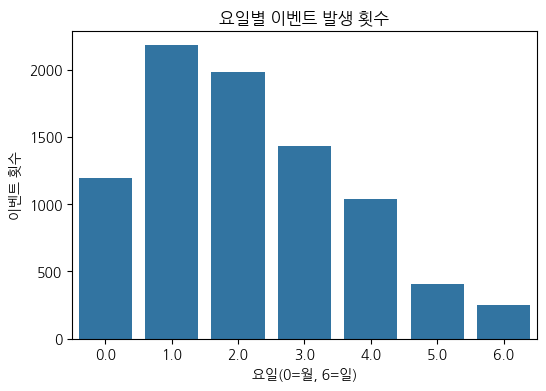

In [ ]:
# 변환된 날짜/시간 컬럼을 기반으로 추가 분석(요일, 시각대, 월별 집계 등) 가능
df['event_hour'] = df['event_time'].dt.hour
df['event_dayofweek'] = pd.to_datetime(df['event_dt']).dt.dayofweek

# 예: 요일별 이벤트 수
weekday_counts = df['event_dayofweek'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title("요일별 이벤트 발생 횟수")
plt.xlabel("요일(0=월, 6=일)")
plt.ylabel("이벤트 횟수")
plt.show()

In [ ]:
df['event_dt'].describe()

,event_dt
count,8470
mean,2024-12-30 09:23:04.746162688
min,2024-12-06 00:00:00
25%,2024-12-18 00:00:00
50%,2024-12-31 00:00:00
75%,2025-01-08 00:00:00
max,2025-01-31 00:00:00


<Axes: xlabel='event_dt'>

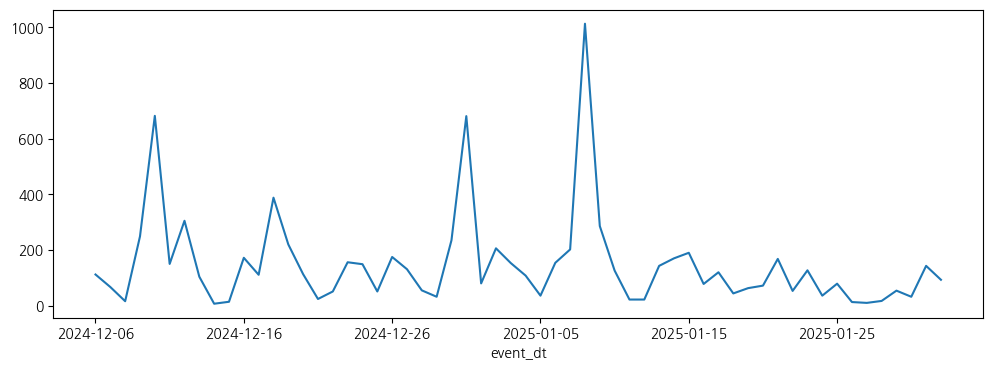

In [ ]:
df['event_dt'].astype(str).value_counts().sort_index().plot(figsize=(12, 4))

In [ ]:
print("\n[event_name별 빈도수]")
event_counts = df['event_name'].value_counts()
display(event_counts)


[event_name별 빈도수]


,count
event_name,
scroll,2156
page_view,2109
set_user_property,903
session_start,711
user_engagement,577
dashboard_gnb_click,568
dashboard_lnb_click,408
first_visit,392
gnb_click,313


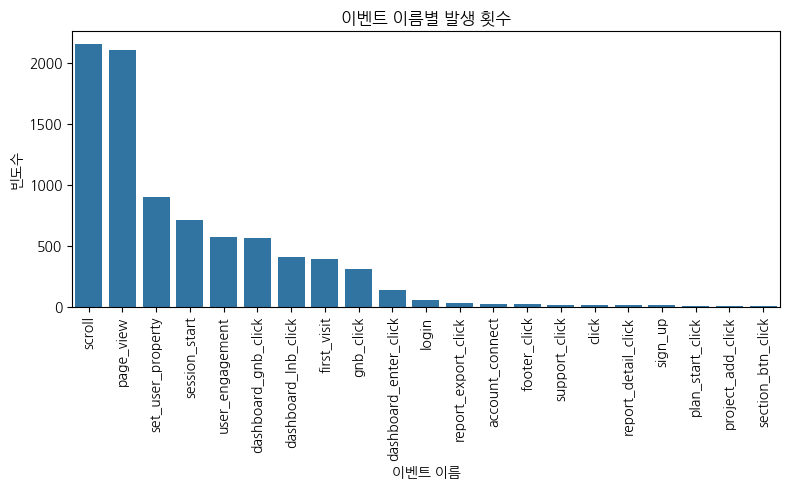

In [ ]:
# 막대 그래프로 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=event_counts.index, y=event_counts.values)
plt.title("이벤트 이름별 발생 횟수")
plt.xlabel("이벤트 이름")
plt.ylabel("빈도수")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 전처리 필요

In [ ]:
import json
from pandas import json_normalize

# 1) 문자열 -> 파이썬 dict로 변환
# 2) dict 안의 'device' 키에 해당하는 딕셔너리만 추출
# 3) 그걸 바로 json_normalize로 펼쳐서 데이터프레임화
df_device_flat = (
    df['device']
      .apply(json.loads)              # 문자열 -> dict
      .apply(lambda x: x.get('device', {}))  # "device" 키값 추출
      .pipe(json_normalize)           # dict -> df로 펼치기
)

# device.* 접두사가 붙는 경우가 있다면, 아래처럼 컬럼명 간단히 조정
# df_device_flat.columns = df_device_flat.columns.str.replace('device.', '')

# 4) 기존 df와 좌우로 합치기
df = pd.concat([df, df_device_flat], axis=1)

# 잘 합쳐졌는지 확인
df.head()

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,...,advertising_id,language,is_limited_ad_tracking,time_zone_offset_seconds,browser,browser_version,web_info.browser,web_info.browser_version,web_info.hostname,unified_screen_name
0,20241229.0,1.735406e+15,session_start,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,...,NaN,ko-kr,No,NaN,NaN,NaN,Safari,17.2,datanugget.io,NaN
1,20241229.0,1.735406e+15,set_user_property,"{\n ""event_params"": [{\n ""key"": ""session_e...",NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,...,NaN,ko-kr,No,NaN,NaN,NaN,Safari,17.2,datanugget.io,NaN
2,20241229.0,1.735475e+15,first_visit,"{\n ""event_params"": [{\n ""key"": ""page_loca...",NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,...,NaN,ko-kr,No,NaN,NaN,NaN,Chrome,131.0.6778.205,datanugget.io,NaN
3,20241229.0,1.735475e+15,session_start,"{\n ""event_params"": [{\n ""key"": ""page_loca...",NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,...,NaN,ko-kr,No,NaN,NaN,NaN,Chrome,131.0.6778.205,datanugget.io,NaN
4,20241229.0,1.735475e+15,set_user_property,"{\n ""event_params"": [{\n ""key"": ""page_loca...",NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,...,NaN,ko-kr,No,NaN,NaN,NaN,Chrome,131.0.6778.205,datanugget.io,NaN


In [ ]:
import pandas as pd
import json
from pandas import json_normalize

# 예시: JSON 형태로 파싱해야 할 컬럼들 목록
json_cols = [
    'event_params', 'device', 'geo', 'app_info', 'traffic_source',
    'user_properties', 'user_ltv', 'event_dimensions', 'ecommerce',
    'items', 'collected_traffic_source', 'session_traffic_source_last_click',
    'publisher', 'privacy_info'
]

def parse_json(x):
    """
    JSON 문자열을 dict로 안전하게 변환.
    파싱 실패 시 빈 dict를 반환.
    """
    try:
        return json.loads(x)
    except:
        return {}

# 1) JSON 파싱 & 펼치기
for col in json_cols:
    # 1) 각 컬럼을 dict로 변환
    parsed_series = df[col].apply(parse_json)

    # 2) dict를 펼쳐서 DataFrame으로 만들기
    df_flat = json_normalize(parsed_series)

    # 3) 중복되지 않도록 새로운 컬럼명에 prefix를 추가
    df_flat.columns = [f"{col}.{subcol}" for subcol in df_flat.columns]

    # 4) 기존 df와 좌우로 합치기
    df = pd.concat([df, df_flat], axis=1)

# 2) 원본 JSON 컬럼 제거
df.drop(columns=json_cols, inplace=True)

# 결과 확인
df.head()


,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,...,session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.rendering_id,session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.site_id,session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.site_name,session_traffic_source_last_click.session_traffic_source_last_click.dv360_campaign,publisher.publisher,privacy_info.privacy_info.analytics_storage,privacy_info.privacy_info.ads_storage,privacy_info.privacy_info.uses_transient_token,privacy_info.privacy_info.is_limited_ad_tracking,privacy_info.privacy_info.is_ads_personalization_allowed
0,20241229.0,1.735406e+15,session_start,NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,1.735183e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
1,20241229.0,1.735406e+15,set_user_property,NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,1.735183e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
2,20241229.0,1.735475e+15,first_visit,NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,1.735475e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
3,20241229.0,1.735475e+15,session_start,NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,1.735475e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
4,20241229.0,1.735475e+15,set_user_property,NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,1.735475e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN


In [ ]:
df.shape

(8563, 145)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8563 entries, 0 to 8562
Columns: 145 entries, event_date to privacy_info.privacy_info.is_ads_personalization_allowed
dtypes: datetime64[ns](2), float64(46), int64(1), object(96)
memory usage: 9.5+ MB


In [ ]:
df.columns

Index(['event_date', 'event_timestamp', 'event_name',
       'event_previous_timestamp', 'event_value_in_usd',
       'event_bundle_sequence_id', 'event_server_timestamp_offset', 'user_id',
       'user_pseudo_id', 'user_first_touch_timestamp',
       ...
       'session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.rendering_id',
       'session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.site_id',
       'session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.site_name',
       'session_traffic_source_last_click.session_traffic_source_last_click.dv360_campaign',
       'publisher.publisher', 'privacy_info.privacy_info.analytics_storage',
       'privacy_info.privacy_info.ads_storage',
       'privacy_info.privacy_info.uses_transient_token',
       'privacy_info.privacy_info.is_limited_ad_tracking',
       'privacy_info.privacy_info.is_ads_personalization_allowed'],
      dtype='object', length=145

In [ ]:
# df[json_cols] = df[json_cols].astype('string')
# df[json_cols].info()

In [ ]:
df

,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,...,session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.rendering_id,session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.site_id,session_traffic_source_last_click.session_traffic_source_last_click.cm360_campaign.site_name,session_traffic_source_last_click.session_traffic_source_last_click.dv360_campaign,publisher.publisher,privacy_info.privacy_info.analytics_storage,privacy_info.privacy_info.ads_storage,privacy_info.privacy_info.uses_transient_token,privacy_info.privacy_info.is_limited_ad_tracking,privacy_info.privacy_info.is_ads_personalization_allowed
0,20241229.0,1.735406e+15,session_start,NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,1.735183e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
1,20241229.0,1.735406e+15,set_user_property,NaN,NaN,-1.570617e+09,NaN,NaN,7.997174e+08,1.735183e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
2,20241229.0,1.735475e+15,first_visit,NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,1.735475e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
3,20241229.0,1.735475e+15,session_start,NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,1.735475e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
4,20241229.0,1.735475e+15,set_user_property,NaN,NaN,-8.775060e+08,NaN,NaN,1.271534e+09,1.735475e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8558,20250111.0,1.736584e+15,page_view,NaN,NaN,2.705099e+07,NaN,NaN,1.637953e+09,1.736584e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
8559,20250111.0,1.736584e+15,page_view,NaN,NaN,2.705099e+07,NaN,NaN,1.637953e+09,1.736584e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
8560,20250111.0,1.736584e+15,first_visit,NaN,NaN,-4.644725e+07,NaN,NaN,1.637953e+09,1.736584e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN
8561,20250111.0,1.736584e+15,session_start,NaN,NaN,-4.644725e+07,NaN,NaN,1.637953e+09,1.736584e+15,...,(not set),(not set),(not set),NaN,NaN,NaN,NaN,No,NaN,NaN


In [ ]:
# 모든 범주형(문자형, bool) 컬럼 추출
cat_cols = df.select_dtypes(include=['object']).columns
# 점(.)이 들어있는 컬럼을 제외
cat_cols = [col for col in cat_cols if '.' not in col]
cat_cols

['event_name',
 'platform',
 'is_active_user',
 'user_info',
 'audiences',
 'predictions',
 'event_date_str',
 'category',
 'mobile_brand_name',
 'mobile_model_name',
 'mobile_marketing_name',
 'mobile_os_hardware_model',
 'operating_system',
 'operating_system_version',
 'language',
 'is_limited_ad_tracking',
 'unified_screen_name']

## 이벤트 분석

In [ ]:
# df['event_name']

## 모든 범주 데이터 분석

In [ ]:
# 모든 범주형(문자형, bool) 컬럼 추출
for col in cat_cols:
    print(f"[{col}] - value_counts():")
    if df[col].nunique(dropna=False) <= 50:
        print(df[col].value_counts(dropna=False))
        print("-" * 40)  # 구분선

[event_name] - value_counts():
event_name
scroll                   2156
page_view                2109
set_user_property         903
session_start             711
user_engagement           577
dashboard_gnb_click       568
dashboard_lnb_click       408
first_visit               392
gnb_click                 313
dashboard_enter_click     135
NaN                        93
login                      52
report_export_click        29
account_connect            21
footer_click               19
support_click              18
click                      16
report_detail_click        15
sign_up                    12
plan_start_click            8
project_add_click           5
section_btn_click           3
Name: count, dtype: int64
----------------------------------------
[platform] - value_counts():
platform
WEB    8470
NaN      93
Name: count, dtype: int64
----------------------------------------
[is_active_user] - value_counts():
is_active_user
True     8418
NaN        93
False      52
Name: coun

In [ ]:
# dot_cols = [col for col in df.columns if '.' in col]
# print(dot_cols)

	user_properties.user_properties
8	[{'key': 'na_body_type', 'value': {'string_value': '모래시계형', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835861000'}}, {'key': 'ga_session_number', 'value': {'string_value': None, 'int_value': '172', 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1731485276933000'}}, {'key': 'na_gender', 'value': {'string_value': '여자', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835855000'}}, {'key': 'na_shoulder', 'value': {'string_value': '크다', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835858000'}}, {'key': 'ga_session_id', 'value': {'string_value': None, 'int_value': '1731485276', 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1731485276933000'}}, {'key': 'na_top', 'value': {'string_value': '미설정', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835859000'}}, {'key': 'na_waist', 'value': {'string_value': '크다', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835858000'}}, {'key': 'na_job', 'value': {'string_value': '학생', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835861000'}}, {'key': 'na_thigh', 'value': {'string_value': '크다', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835858000'}}, {'key': 'na_age', 'value': {'string_value': '21', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835857000'}}, {'key': 'na_bottom', 'value': {'string_value': '미설정', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835861000'}}, {'key': 'na_skin_type', 'value': {'string_value': '가을', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835857000'}}, {'key': 'na_middle', 'value': {'string_value': '크다', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835859000'}}, {'key': 'na_height', 'value': {'string_value': '160', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835856000'}}, {'key': 'na_face_type', 'value': {'string_value': '사각형', 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1730298835857000'}}, {'key': 'first_open_time', 'value': {'string_value': None, 'int_value': '1717070400000', 'float_value': None, 'double_value': None, 'set_timestamp_micros': '1717068513956000'}}]

In [ ]:
df.to_csv('preprocessing_ga.csv', index=False)

In [ ]:

# 우선 user_pseudo_id, event_timestamp 순으로 정렬 (이벤트 시간 순서대로 분석)
df_sorted = df.sort_values(by=["user_pseudo_id", "event_timestamp"], ascending=True).reset_index(drop=True)


In [ ]:
# # 각 user_pseudo_id가 어떤 이벤트를 어떤 순서로 수행했는지
# user_event_sequence = (
#     df_sorted
#     .groupby("user_pseudo_id")["event_name"]
#     .apply(list)
# )

# # 예시 출력
# for user, events in user_event_sequence.items():
#     print(f"User: {user}")
#     print(f"Event Flow: {events}")
#     print("----")


## 아하모먼트
* target_event = 'session_start' 로 구해보기

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def analyze_aha_retention(df, target_event='session_start',
                        aha_days=7, aha_threshold=3, retention_day=14):
    """
    Aha 모먼트 기준 리텐션 분석

    Parameters:
    - df: 데이터프레임
    - target_event: 분석할 이벤트명
    - aha_days: Aha 모먼트 판단 기간 (일)
    - aha_threshold: Aha 모먼트 기준 이벤트 발생 횟수
    - retention_day: 리텐션 체크 기준일
    """

    # 날짜 데이터 변환
    df['date'] = pd.to_datetime(df['event_date'], format='%Y%m%d')

    # 사용자별 첫 방문일 확인
    first_visits = df.groupby('user_pseudo_id')['date'].min().reset_index()
    first_visits.columns = ['user_pseudo_id', 'first_visit_date']

    # Aha 모먼트 판단을 위한 기간 설정
    first_visits['aha_deadline'] = first_visits['first_visit_date'] + pd.Timedelta(days=aha_days)
    first_visits['retention_check_date'] = first_visits['first_visit_date'] + pd.Timedelta(days=retention_day)

    # 사용자별 Aha 기간 내 이벤트 횟수 계산
    def count_events_in_period(user_data, start_date, end_date, event_name):
        return len(user_data[
            (user_data['date'] >= start_date) &
            (user_data['date'] <= end_date) &
            (user_data['event_name'] == event_name)
        ])

    # Aha 유저 판별
    aha_users = []
    for _, row in first_visits.iterrows():
        user_data = df[df['user_pseudo_id'] == row['user_pseudo_id']]
        event_count = count_events_in_period(
            user_data,
            row['first_visit_date'],
            row['aha_deadline'],
            target_event
        )
        aha_users.append({
            'user_pseudo_id': row['user_pseudo_id'],
            'is_aha_user': event_count >= aha_threshold,
            'first_visit_date': row['first_visit_date'],
            'retention_check_date': row['retention_check_date'],
            'event_count_7d': event_count
        })

    aha_users_df = pd.DataFrame(aha_users)

    # 14일차 리텐션 확인
    retention_results = []
    for _, user in aha_users_df.iterrows():
        user_data = df[df['user_pseudo_id'] == user['user_pseudo_id']]
        is_retained = len(user_data[
            (user_data['date'] >= user['retention_check_date']) &
            (user_data['date'] < user['retention_check_date'] + pd.Timedelta(days=1))
        ]) > 0

        retention_results.append({
            'user_pseudo_id': user['user_pseudo_id'],
            'is_aha_user': user['is_aha_user'],
            'is_retained': is_retained
        })

    retention_df = pd.DataFrame(retention_results)

    # 결과 분석
    aha_retention = retention_df[retention_df['is_aha_user']]['is_retained'].mean() * 100
    non_aha_retention = retention_df[~retention_df['is_aha_user']]['is_retained'].mean() * 100

    results = {
        'total_users': len(retention_df),
        'aha_users': len(retention_df[retention_df['is_aha_user']]),
        'non_aha_users': len(retention_df[~retention_df['is_aha_user']]),
        'aha_retention_rate': aha_retention,
        'non_aha_retention_rate': non_aha_retention,
        'retention_difference': aha_retention - non_aha_retention,
        'raw_data': retention_df
    }

    return results

def print_analysis_results(results):
    """
    분석 결과 출력
    """
    print("\n=== Aha 모먼트 리텐션 분석 결과 ===")
    print(f"\n총 사용자 수: {results['total_users']:,}명")
    print(f"Aha 유저 수: {results['aha_users']:,}명 ({results['aha_users']/results['total_users']*100:.1f}%)")
    print(f"비 Aha 유저 수: {results['non_aha_users']:,}명 ({results['non_aha_users']/results['total_users']*100:.1f}%)")
    print(f"\n14일차 리텐션율:")
    print(f"- Aha 유저: {results['aha_retention_rate']:.1f}%")
    print(f"- 비 Aha 유저: {results['non_aha_retention_rate']:.1f}%")
    print(f"- 리텐션 차이: {results['retention_difference']:.1f}%p")

    if results['retention_difference'] > 0:
        print(f"\n→ Aha 유저의 리텐션이 {abs(results['retention_difference']):.1f}%p 더 높습니다.")
    else:
        print(f"\n→ 비 Aha 유저의 리텐션이 {abs(results['retention_difference']):.1f}%p 더 높습니다.")

# 사용 예시
results = analyze_aha_retention(df)
print_analysis_results(results)

# 위의 데이터셋에서 가입 후 7일 동안 특정 행동(예: ‘session_start’)을 3번 이상 한 사용자를 ‘Aha 유저’로 정의하고, Aha 유저와 비Aha 유저의 14일차 리텐션율을 비교하는 코드를 작성해줘.


=== Aha 모먼트 리텐션 분석 결과 ===

총 사용자 수: 595명
Aha 유저 수: 26명 (4.4%)
비 Aha 유저 수: 569명 (95.6%)

14일차 리텐션율:
- Aha 유저: 3.8%
- 비 Aha 유저: 0.2%
- 리텐션 차이: 3.7%p

→ Aha 유저의 리텐션이 3.7%p 더 높습니다.


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def analyze_aha_user_retention(df, target_event='set_user_property',
                             aha_window=7, aha_threshold=3, retention_day=14):
    """
    Aha 유저와 비Aha 유저의 리텐션율 분석

    Parameters:
    - df: 데이터프레임
    - target_event: 분석할 이벤트명 (default: 'set_user_property')
    - aha_window: Aha 판단 기간 (일)
    - aha_threshold: Aha 기준 이벤트 발생 횟수
    - retention_day: 리텐션 체크 기준일
    """

    # 날짜 형식 변환
    df['date'] = pd.to_datetime(df['event_date'], format='%Y%m%d')

    # 사용자별 첫 방문일 확인
    first_visits = df.groupby('user_pseudo_id')['date'].min().reset_index()
    first_visits.columns = ['user_pseudo_id', 'first_visit']

    # Aha 판단 기간과 리텐션 체크일 설정
    first_visits['aha_deadline'] = first_visits['first_visit'] + pd.Timedelta(days=aha_window)
    first_visits['retention_date'] = first_visits['first_visit'] + pd.Timedelta(days=retention_day)

    # Aha 유저 판별
    aha_users = []
    for _, row in first_visits.iterrows():
        user_data = df[df['user_pseudo_id'] == row['user_pseudo_id']]

        # Aha 기간 내 이벤트 횟수 계산
        aha_period_events = user_data[
            (user_data['date'] >= row['first_visit']) &
            (user_data['date'] <= row['aha_deadline']) &
            (user_data['event_name'] == target_event)
        ]

        # 리텐션 체크
        retention_check = user_data[
            (user_data['date'] >= row['retention_date']) &
            (user_data['date'] < row['retention_date'] + pd.Timedelta(days=1))
        ]

        aha_users.append({
            'user_pseudo_id': row['user_pseudo_id'],
            'is_aha_user': len(aha_period_events) >= aha_threshold,
            'event_count': len(aha_period_events),
            'is_retained': len(retention_check) > 0,
            'first_visit': row['first_visit']
        })

    # 결과 데이터프레임 생성
    results_df = pd.DataFrame(aha_users)

    # 리텐션율 계산
    aha_retention = results_df[results_df['is_aha_user']]['is_retained'].mean() * 100
    non_aha_retention = results_df[~results_df['is_aha_user']]['is_retained'].mean() * 100

    # 상세 분석 결과
    analysis_results = {
        'total_users': len(results_df),
        'aha_users': len(results_df[results_df['is_aha_user']]),
        'non_aha_users': len(results_df[~results_df['is_aha_user']]),
        'aha_retention_rate': aha_retention,
        'non_aha_retention_rate': non_aha_retention,
        'retention_difference': aha_retention - non_aha_retention,
        'event_frequency': results_df['event_count'].describe(),
        'detailed_data': results_df
    }

    return analysis_results

def print_analysis_summary(results):
    """
    분석 결과 요약 출력
    """
    print("\n=== Aha 모먼트 리텐션 분석 결과 ===")
    print(f"\n전체 사용자 수: {results['total_users']:,}명")
    print(f"Aha 유저 수: {results['aha_users']:,}명 ({results['aha_users']/results['total_users']*100:.1f}%)")
    print(f"비 Aha 유저 수: {results['non_aha_users']:,}명 ({results['non_aha_users']/results['total_users']*100:.1f}%)")

    print(f"\n14일차 리텐션율:")
    print(f"Aha 유저: {results['aha_retention_rate']:.1f}%")
    print(f"비 Aha 유저: {results['non_aha_retention_rate']:.1f}%")
    print(f"리텐션 차이: {results['retention_difference']:.1f}%p")

    print("\n이벤트 발생 빈도 분포:")
    print(results['event_frequency'])

# 사용 예시
# df는 원본 데이터프레임
results = analyze_aha_user_retention(df)
print_analysis_summary(results)

# 위의 데이터셋에서 가입 후 7일 동안 특정 행동(예: ‘set_user_property’)을 3번 이상 한 사용자를 ‘Aha 유저’로 정의하고, Aha 유저와 비Aha 유저의 14일차 리텐션율을 비교하는 코드를 작성해줘


=== Aha 모먼트 리텐션 분석 결과 ===

전체 사용자 수: 595명
Aha 유저 수: 58명 (9.7%)
비 Aha 유저 수: 537명 (90.3%)

14일차 리텐션율:
Aha 유저: 1.7%
비 Aha 유저: 0.2%
리텐션 차이: 1.5%p

이벤트 발생 빈도 분포:
count    595.000000
mean       1.310924
std        2.458230
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max       33.000000
Name: event_count, dtype: float64


In [ ]:
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta


=== 페이지뷰 기반 Aha 모먼트 분석 결과 ===

총 사용자 수: 595명
Aha 유저 수: 70명 (11.8%)
비 Aha 유저 수: 525명 (88.2%)

14일차 리텐션율:
Aha 유저: 1.4%
비 Aha 유저: 0.2%
리텐션 차이: 1.2%p

7일간 페이지뷰 통계:
평균: 2.7
중앙값: 1.0
최소값: 0
최대값: 160


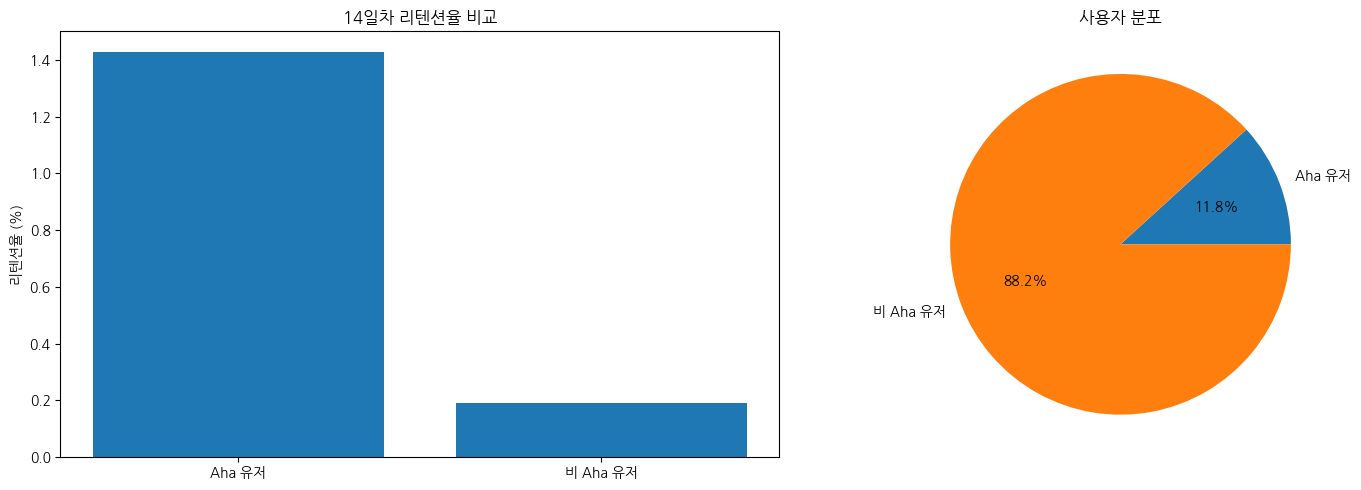

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def analyze_pageview_retention(df, aha_threshold=5, aha_window=7, retention_day=14):
    """
    페이지뷰 기반 Aha 유저 분석 및 리텐션 비교

    Parameters:
    - df: 데이터프레임
    - aha_threshold: Aha 유저 판단을 위한 최소 페이지뷰 수
    - aha_window: Aha 판단 기간 (일)
    - retention_day: 리텐션 체크 기준일
    """
    # 날짜 데이터 변환
    df['date'] = pd.to_datetime(df['event_date'], format='%Y%m%d')

    # 사용자별 첫 방문일 확인
    first_visits = df.groupby('user_pseudo_id')['date'].min().reset_index()
    first_visits.columns = ['user_pseudo_id', 'first_visit']

    # 분석 기간 설정
    first_visits['aha_deadline'] = first_visits['first_visit'] + pd.Timedelta(days=aha_window)
    first_visits['retention_check_date'] = first_visits['first_visit'] + pd.Timedelta(days=retention_day)

    # 사용자별 분석 수행
    user_analysis = []

    for _, user in first_visits.iterrows():
        user_data = df[df['user_pseudo_id'] == user['user_pseudo_id']]

        # Aha 기간 내 페이지뷰 수 계산
        pageviews_in_period = len(user_data[
            (user_data['date'] >= user['first_visit']) &
            (user_data['date'] <= user['aha_deadline']) &
            (user_data['event_name'] == 'page_view')
        ])

        # 리텐션 체크 (14일차 방문 여부)
        is_retained = len(user_data[
            (user_data['date'] >= user['retention_check_date']) &
            (user_data['date'] < user['retention_check_date'] + pd.Timedelta(days=1))
        ]) > 0

        user_analysis.append({
            'user_pseudo_id': user['user_pseudo_id'],
            'pageviews': pageviews_in_period,
            'is_aha_user': pageviews_in_period >= aha_threshold,
            'is_retained': is_retained,
            'first_visit': user['first_visit']
        })

    # 분석 결과 데이터프레임 생성
    results_df = pd.DataFrame(user_analysis)

    # 그룹별 리텐션율 계산
    aha_retention = results_df[results_df['is_aha_user']]['is_retained'].mean() * 100
    non_aha_retention = results_df[~results_df['is_aha_user']]['is_retained'].mean() * 100

    # 상세 분석 결과
    analysis_results = {
        'total_users': len(results_df),
        'aha_users': len(results_df[results_df['is_aha_user']]),
        'non_aha_users': len(results_df[~results_df['is_aha_user']]),
        'aha_retention_rate': aha_retention,
        'non_aha_retention_rate': non_aha_retention,
        'retention_difference': aha_retention - non_aha_retention,
        'pageview_stats': results_df['pageviews'].describe(),
        'raw_data': results_df
    }

    return analysis_results

def generate_retention_report(results):
    """
    분석 결과 리포트 생성
    """
    report = []
    report.append("\n=== 페이지뷰 기반 Aha 모먼트 분석 결과 ===\n")

    # 기본 통계
    report.append(f"총 사용자 수: {results['total_users']:,}명")
    report.append(f"Aha 유저 수: {results['aha_users']:,}명 ({results['aha_users']/results['total_users']*100:.1f}%)")
    report.append(f"비 Aha 유저 수: {results['non_aha_users']:,}명 ({results['non_aha_users']/results['total_users']*100:.1f}%)")

    # 리텐션 분석
    report.append("\n14일차 리텐션율:")
    report.append(f"Aha 유저: {results['aha_retention_rate']:.1f}%")
    report.append(f"비 Aha 유저: {results['non_aha_retention_rate']:.1f}%")
    report.append(f"리텐션 차이: {results['retention_difference']:.1f}%p")

    # 페이지뷰 통계
    report.append("\n7일간 페이지뷰 통계:")
    stats = results['pageview_stats']
    report.append(f"평균: {stats['mean']:.1f}")
    report.append(f"중앙값: {stats['50%']:.1f}")
    report.append(f"최소값: {stats['min']:.0f}")
    report.append(f"최대값: {stats['max']:.0f}")

    return "\n".join(report)

def visualize_retention_analysis(results):
    """
    리텐션 분석 결과 시각화
    """
    import matplotlib.pyplot as plt

    # 그래프 생성
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # 리텐션율 비교 막대 그래프
    retention_data = [
        results['aha_retention_rate'],
        results['non_aha_retention_rate']
    ]
    ax1.bar(['Aha 유저', '비 Aha 유저'], retention_data)
    ax1.set_title('14일차 리텐션율 비교')
    ax1.set_ylabel('리텐션율 (%)')

    # 사용자 분포 파이 차트
    user_dist = [results['aha_users'], results['non_aha_users']]
    ax2.pie(user_dist, labels=['Aha 유저', '비 Aha 유저'], autopct='%1.1f%%')
    ax2.set_title('사용자 분포')

    plt.tight_layout()
    return fig

# 사용 예시
results = analyze_pageview_retention(df)
print(generate_retention_report(results))
fig = visualize_retention_analysis(results)
plt.show()

## 리텐션


=== 주간 코호트 리텐션 분석 ===

전체 평균 리텐션율:
Week 0: 100.0%
Week 1: 4.1%
Week 2: 2.1%
Week 3: 1.7%
Week 4: 2.1%
Week 5: 1.0%
Week 6: 1.4%
Week 7: 0.6%

최근 코호트 (2025-01-27) 리텐션율:
Week 0: 100.0%
Week 1: 0.0%
Week 2: 0.0%
Week 3: 0.0%
Week 4: 0.0%
Week 5: 0.0%
Week 6: 0.0%
Week 7: 0.0%

코호트 크기 분석:
평균 코호트 크기: 48.6
최대 코호트 크기: 90
최소 코호트 크기: 19

최고 성과 코호트 (Week 1 기준): 2024-12-02
최저 성과 코호트 (Week 1 기준): 2025-01-20


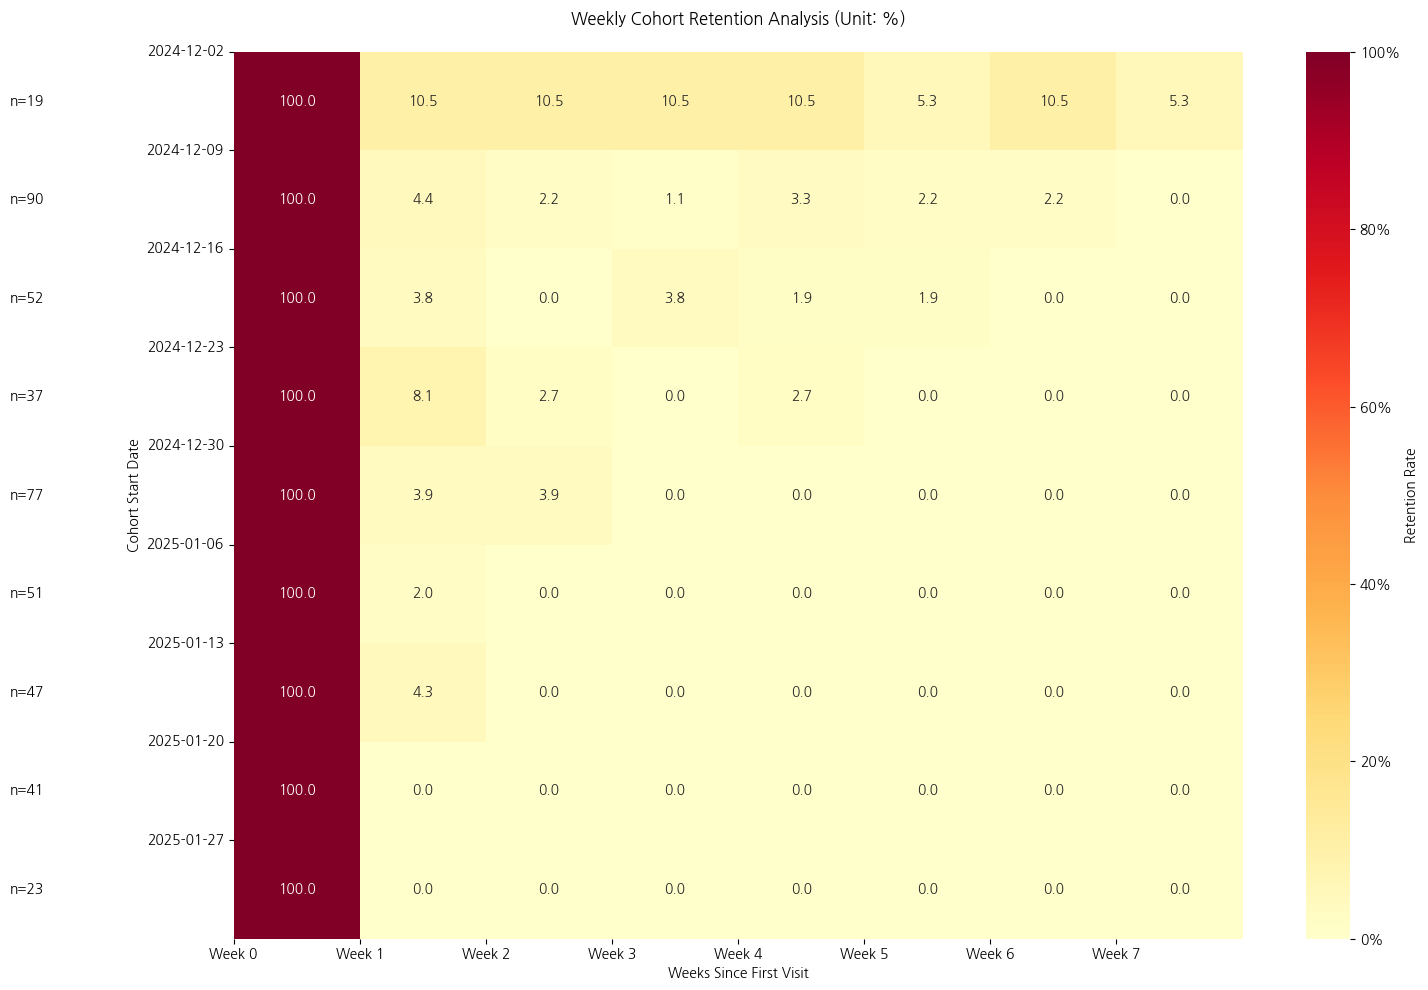

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

def analyze_weekly_retention(df, max_weeks=8):
    """
    주 단위 리텐션 분석 함수
    Args:
        df: 분석할 데이터프레임
        max_weeks: 분석할 최대 주차 수 (기본값: 8주)
    Returns:
        retention_pivot: 코호트별 리텐션 데이터프레임
    """
    # 문자열 형태의 event_date를 datetime 객체로 변환
    df['date'] = pd.to_datetime(df['event_date'], format='%Y%m%d')

    # 각 날짜의 요일 번호(0:월요일 ~ 6:일요일)를 사용하여 해당 주의 시작일(월요일) 계산
    df['week_start'] = df['date'] - pd.to_timedelta(df['date'].dt.dayofweek, unit='D')

    # session_start 이벤트만 필터링하여 사용자별 첫 방문 주의 시작일 확인
    first_visits = df[df['event_name'] == 'session_start'].groupby('user_pseudo_id').agg({
        'week_start': 'min'  # 각 사용자의 최초 방문 주 시작일
    }).reset_index()

    # 리텐션 데이터를 저장할 리스트 초기화
    retention_data = []

    # 각 사용자별로 주차별 방문 여부 확인
    for _, user in first_visits.iterrows():
        # 현재 사용자의 모든 세션 데이터 추출
        user_sessions = df[
            (df['user_pseudo_id'] == user['user_pseudo_id']) &
            (df['event_name'] == 'session_start')
        ]

        # 각 주차별로 방문 여부 확인
        for week in range(max_weeks):
            # 현재 주차의 시작일과 다음 주차 시작일 계산
            week_date = user['week_start'] + timedelta(weeks=week)
            next_week = week_date + timedelta(weeks=1)

            # 해당 주차에 방문했는지 여부 확인 (True/False)
            visited = len(user_sessions[
                (user_sessions['date'] >= week_date) &
                (user_sessions['date'] < next_week)
            ]) > 0

            # 리텐션 데이터 기록
            retention_data.append({
                'cohort_week': user['week_start'],  # 코호트 시작일
                'week_number': week,                # 주차 번호
                'visited': visited                  # 방문 여부
            })

    # 리텐션 데이터를 데이터프레임으로 변환
    retention_df = pd.DataFrame(retention_data)

    # 각 코호트의 사용자 수 계산 (Week 0의 방문자 수)
    cohort_sizes = retention_df[retention_df['week_number'] == 0].groupby('cohort_week').size()

    # 코호트별, 주차별 리텐션율 계산
    retention_pivot = retention_df.pivot_table(
        index='cohort_week',     # 행: 코호트 시작일
        columns='week_number',   # 열: 주차 번호
        values='visited',        # 값: 방문 여부
        aggfunc='mean'          # 평균 계산 (방문한 사용자 비율)
    ) * 100  # 백분율로 변환

    # 코호트 크기 정보를 결과 데이터프레임에 추가
    retention_pivot['cohort_size'] = cohort_sizes

    return retention_pivot

def create_retention_heatmap(retention_df):
    """
    리텐션 데이터를 히트맵으로 시각화하는 함수
    Args:
        retention_df: 리텐션 데이터프레임
    Returns:
        fig: 생성된 matplotlib 그래프 객체
    """
    # 시각화에서 코호트 크기 열 제외
    retention_plot = retention_df.drop('cohort_size', axis=1)

    # 그래프 크기 설정
    plt.figure(figsize=(15, 10))

    # seaborn을 사용하여 히트맵 생성
    sns.heatmap(
        retention_plot,
        annot=True,          # 각 셀에 값 표시
        fmt='.1f',           # 소수점 1자리까지 표시
        cmap='YlOrRd',       # 색상 맵 설정
        vmin=0,              # 최소값 설정
        vmax=100,            # 최대값 설정
        cbar_kws={'format': '%.0f%%', 'label': 'Retention Rate'}  # 컬러바 설정
    )

    # 그래프 제목 설정
    plt.title('Weekly Cohort Retention Analysis (Unit: %)', pad=20)

    # x축, y축 레이블 설정
    plt.xlabel('Weeks Since First Visit')
    plt.ylabel('Cohort Start Date')

    # x축 눈금 레이블 수정 (Week 0, Week 1, ...)
    weeks = [f'Week {i}' for i in range(len(retention_plot.columns))]
    plt.xticks(range(len(weeks)), weeks, rotation=0)

    # y축 날짜 형식 수정 (YYYY-MM-DD)
    date_labels = [d.strftime('%Y-%m-%d') for d in retention_plot.index]
    plt.yticks(range(len(date_labels)), date_labels, rotation=0)

    # 각 코호트의 크기 정보를 y축 레이블 왼쪽에 표시
    for idx, size in enumerate(retention_df['cohort_size']):
        plt.text(-1.5, idx + 0.5, f'n={size}', ha='right', va='center')

    # 그래프 레이아웃 조정
    plt.tight_layout()

    return plt.gcf()

def generate_insights(retention_df):
    """
    리텐션 데이터에서 주요 인사이트를 추출하는 함수
    Args:
        retention_df: 리텐션 데이터프레임
    Returns:
        str: 분석 인사이트 문자열
    """
    insights = []
    insights.append("\n=== 주간 코호트 리텐션 분석 ===\n")

    # 분석용 리텐션 데이터 준비 (코호트 크기 열 제외)
    retention_data = retention_df.drop('cohort_size', axis=1)

    # 주차별 평균 리텐션율 계산
    avg_retention = retention_data.mean()
    insights.append("전체 평균 리텐션율:")
    for week, rate in avg_retention.items():
        insights.append(f"Week {week}: {rate:.1f}%")

    # 가장 최근 코호트의 리텐션율 분석
    latest_date = retention_data.index[-1]
    latest_cohort = retention_data.iloc[-1]
    insights.append(f"\n최근 코호트 ({latest_date.strftime('%Y-%m-%d')}) 리텐션율:")
    for week, rate in latest_cohort.items():
        insights.append(f"Week {week}: {rate:.1f}%")

    # 코호트 크기 관련 통계 분석
    insights.append("\n코호트 크기 분석:")
    insights.append(f"평균 코호트 크기: {retention_df['cohort_size'].mean():.1f}")
    insights.append(f"최대 코호트 크기: {retention_df['cohort_size'].max():.0f}")
    insights.append(f"최소 코호트 크기: {retention_df['cohort_size'].min():.0f}")

    # Week 1 리텐션 기준으로 최고/최저 성과 코호트 식별
    if len(retention_data.columns) > 1:
        best_cohort = retention_data.iloc[:, 1].idxmax()
        worst_cohort = retention_data.iloc[:, 1].idxmin()

        insights.append(f"\n최고 성과 코호트 (Week 1 기준): {best_cohort.strftime('%Y-%m-%d')}")
        insights.append(f"최저 성과 코호트 (Week 1 기준): {worst_cohort.strftime('%Y-%m-%d')}")

    return "\n".join(insights)

# 사용 예시:
#1. 데이터 분석 실행
retention_matrix = analyze_weekly_retention(df)

#2. 히트맵 생성
fig = create_retention_heatmap(retention_matrix)

#3. 인사이트 출력
print(generate_insights(retention_matrix))

#4. 시각화 표시
plt.show()